In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv(r"C:\Users\north\OneDrive\Desktop\zzz\May 10 ML\ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#### copy of dataframe

In [4]:
df = data.copy()

In [5]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Data info

In [6]:
df.shape

(2111, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [8]:
df.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [10]:
df.describe(include='object').T

,count,unique,top,freq
Gender,2111,2,Male,1068
CALC,2111,4,Sometimes,1401
FAVC,2111,2,yes,1866
SCC,2111,2,no,2015
SMOKE,2111,2,no,2067
family_history_with_overweight,2111,2,yes,1726
CAEC,2111,4,Sometimes,1765
MTRANS,2111,5,Public_Transportation,1580
NObeyesdad,2111,7,Obesity_Type_I,351


In [11]:
df.columns.str.strip()

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

#### Checking Duplicate rows

There is no unique column in the datasete, so we used whole row to check duplicate rows.

In [12]:
df.duplicated().sum()

24

In [13]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
97,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
105,25.0,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,25.0,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
145,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
208,22.0,Female,1.69,65.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
209,22.0,Female,1.69,65.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


There are 24 duplicates in the dataset, which is only 1% of the whole dataset. We are drop these duplicates row.

In [14]:
df.drop_duplicates(keep='first', inplace = True )

In [15]:
df.shape

(2087, 17)

#### Checking missing values

In [16]:
df.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

<Axes: >

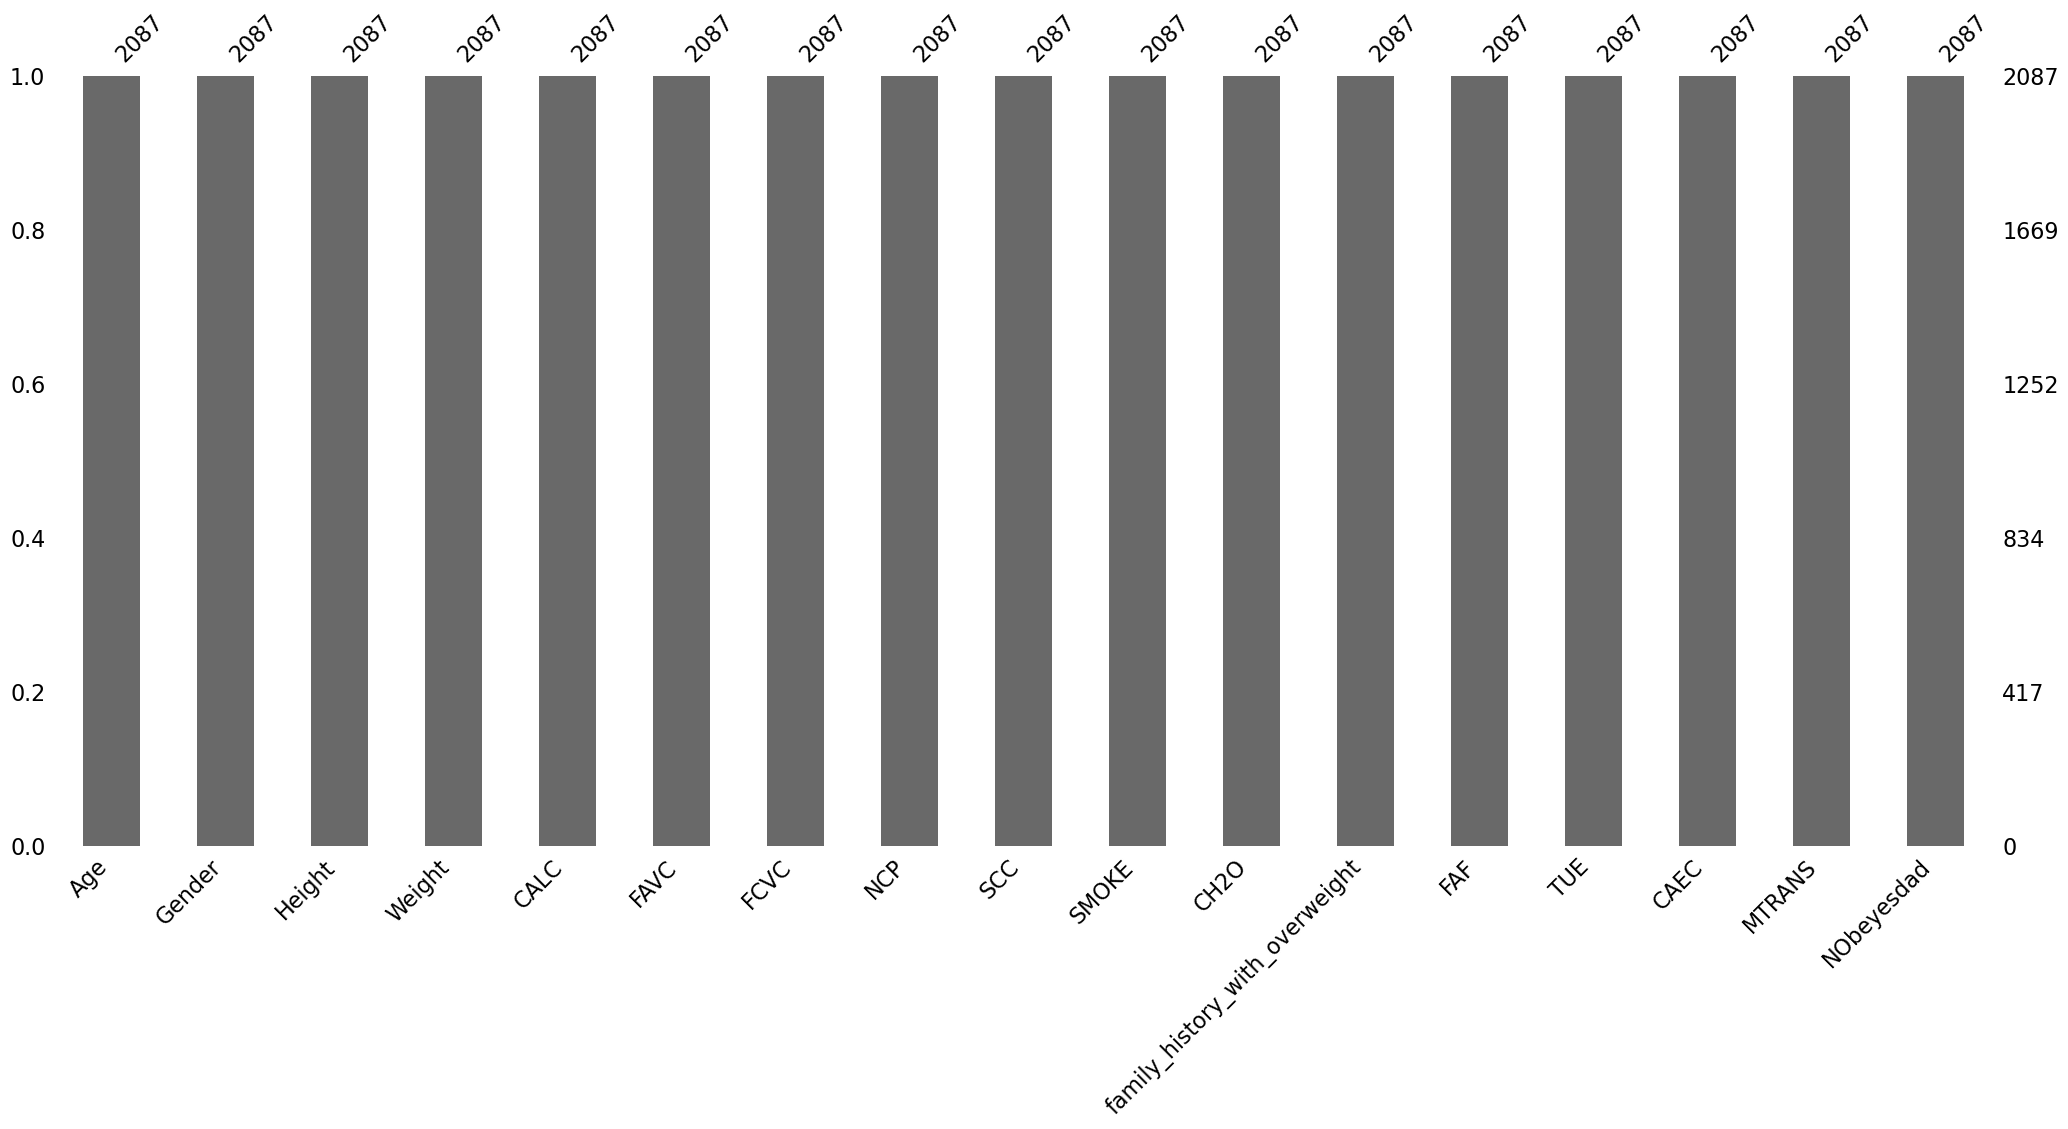

In [17]:
msno.bar(df)

There is no missing values in the dataset.

####  Check for incorrect values in the dataset.

In [18]:
print(df[df['Age'] < 0])

Empty DataFrame
Columns: [Age, Gender, Height, Weight, CALC, FAVC, FCVC, NCP, SCC, SMOKE, CH2O, family_history_with_overweight, FAF, TUE, CAEC, MTRANS, NObeyesdad]
Index: []


In [19]:
print(df[df['Height'] > 3])

Empty DataFrame
Columns: [Age, Gender, Height, Weight, CALC, FAVC, FCVC, NCP, SCC, SMOKE, CH2O, family_history_with_overweight, FAF, TUE, CAEC, MTRANS, NObeyesdad]
Index: []


In [20]:
print(df['Gender'].unique())
print(df['Gender'].value_counts())

['Female' 'Male']
Gender
Male      1052
Female    1035
Name: count, dtype: int64


# EDA

#### 1. Height and Weight Distribution

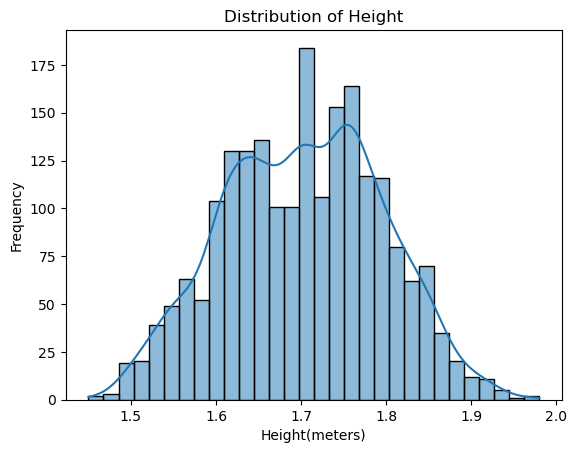

In [21]:
sns.histplot(df['Height'], bins=30, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height(meters)')
plt.ylabel('Frequency')
plt.show()

The distributio of the height is almost normal with slight right skewness. The rangle is from 1 to 2 meters. The most commom height is 1.70 to 1.75 meters.

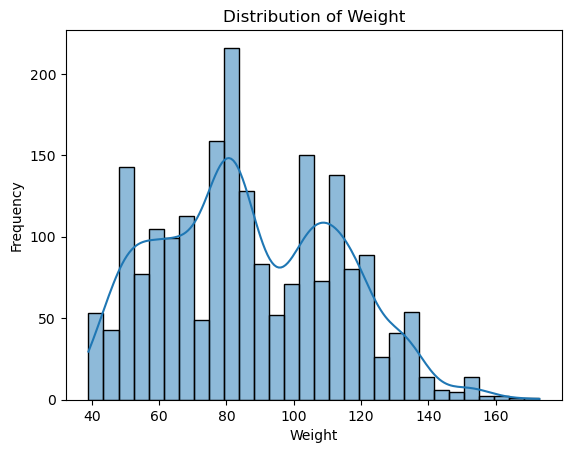

In [22]:
sns.histplot(df['Weight'], bins=30, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

Weight distribution is not symmetric and shows a right skew, indicating that most people have less with tail extending to heavier weights.

#### 2. Top 10 Ages with Highest Weight

In [23]:
age_weight_avg = df.groupby('Age')['Weight'].mean().reset_index()
top_ages_by_weight = age_weight_avg.sort_values(by='Weight', ascending=False).head(10)
print(top_ages_by_weight)

           Age      Weight
559  21.900120  165.057269
245  19.472190  160.935351
495  21.521294  160.639405
402  20.989016  155.872093
467  21.291969  155.242672
337  20.327723  154.618446
321  20.102241  153.959945
349  20.438478  153.149491
95   18.112503  152.720545
97   18.120739  152.567671


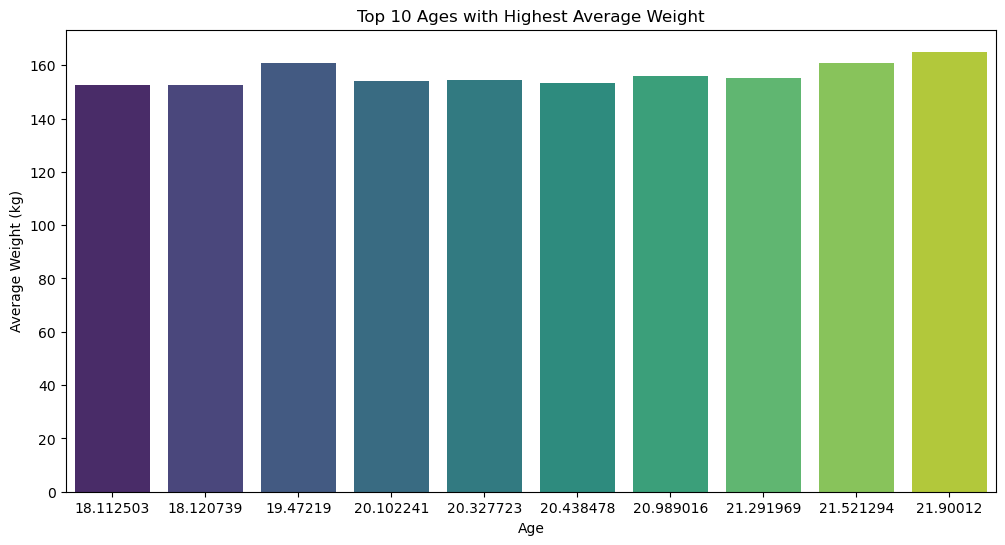

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Weight', data=top_ages_by_weight, palette='viridis')
plt.title('Top 10 Ages with Highest Average Weight')
plt.xlabel('Age')
plt.ylabel('Average Weight (kg)')
plt.show()

#### 3. Distribution of CAEC values

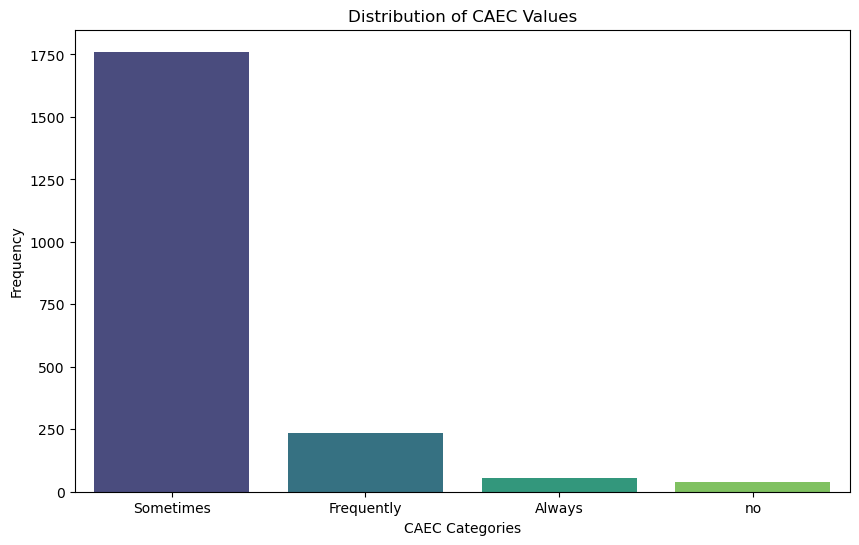

In [25]:
caec_count = df['CAEC'].value_counts().reset_index()
caec_count.columns = ['CAEC', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='CAEC', y='Count', data=caec_count, palette='viridis')
plt.title('Distribution of CAEC Values')
plt.xlabel('CAEC Categories')
plt.ylabel('Frequency')
plt.show()

#### 4. Average Ages with Family History with Overweight

In [26]:
avg_age_by_family = df.groupby('family_history_with_overweight')['Age'].mean().reset_index()
avg_age_by_family.columns = ['Family History of Overweight', 'Average Age']

print(avg_age_by_family)

  Family History of Overweight  Average Age
0                           no    21.581838
1                          yes    24.940492


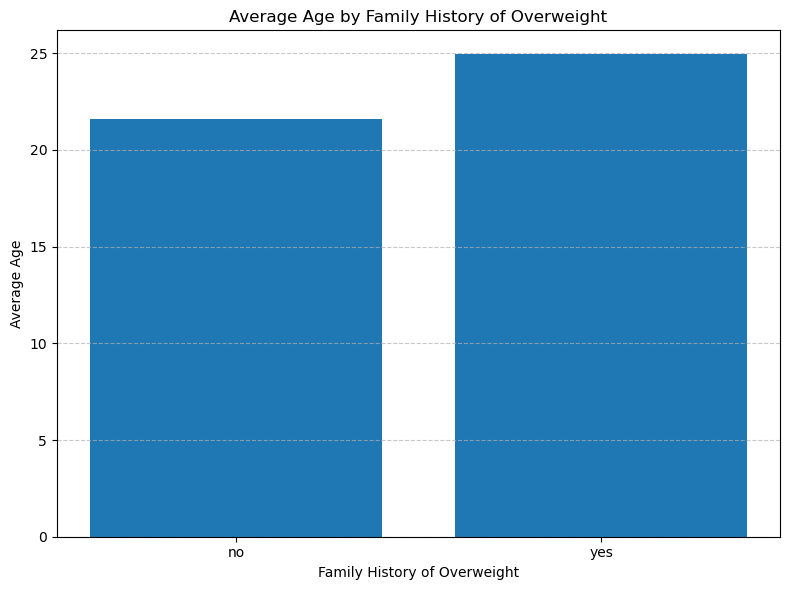

In [27]:
plt.figure(figsize=(8, 6))
plt.bar(avg_age_by_family['Family History of Overweight'], avg_age_by_family['Average Age'])
plt.title('Average Age by Family History of Overweight')
plt.xlabel('Family History of Overweight')
plt.ylabel('Average Age')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 5. Correlation matrix

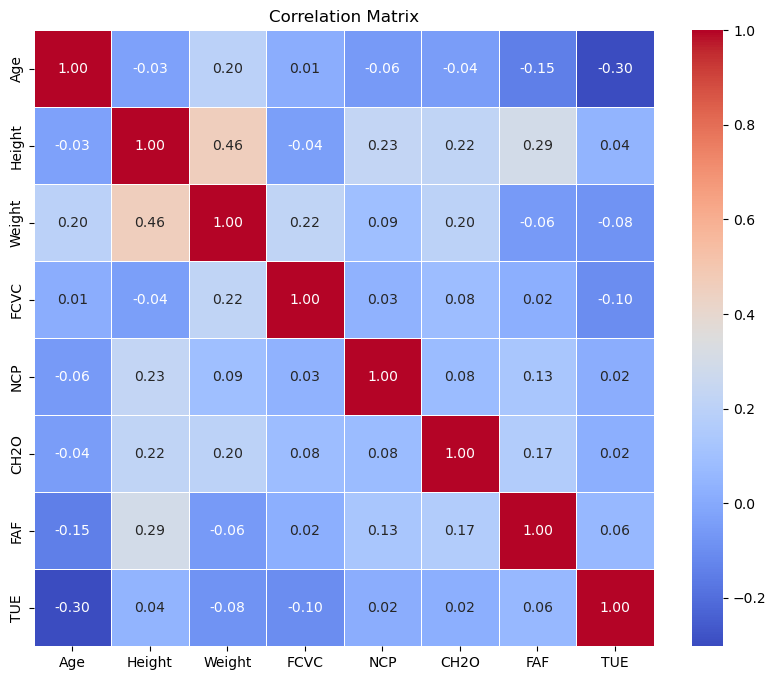

In [28]:
numeric_df = df.drop(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'], axis=1)
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

In [63]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [30]:
df.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

#### Label encoding

In [31]:
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

#### Standard scalar to continuous columns

In [32]:
scaler = StandardScaler()
continuous_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

#### One-hot encoding on categorical columns

In [33]:
df.describe(include='object').T

,count,unique,top,freq
CALC,2087,4,Sometimes,1380
CAEC,2087,4,Sometimes,1761
MTRANS,2087,5,Public_Transportation,1558
NObeyesdad,2087,7,Obesity_Type_I,351


In [34]:
one_hot_columns = ['CALC', 'CAEC','MTRANS']
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

#### Target and Feature variables

In [35]:
x = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

#### Spliting data

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

'NObeyesdad' is a categorical variable with different levels of obesity. Since the variable represents distinct classes, predicting 'NObeyesdad' is a classification problem.
We can use following models.
1. Logistic Regression
2. Decision Trees
3. Random Forests
4. Support Vector Machines (SVM)

#### Decision Tree

In [48]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred_dt = clf.predict(x_test)
y_pred_dt

array(['Obesity_Type_I', 'Obesity_Type_II', 'Normal_Weight',
       'Insufficient_Weight', 'Obesity_Type_II', 'Overweight_Level_I',
       'Overweight_Level_II', 'Obesity_Type_III', 'Insufficient_Weight',
       'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_I',
       'Obesity_Type_III', 'Normal_Weight', 'Overweight_Level_II',
       'Overweight_Level_I', 'Overweight_Level_I', 'Obesity_Type_II',
       'Overweight_Level_II', 'Overweight_Level_I', 'Obesity_Type_III',
       'Overweight_Level_I', 'Overweight_Level_I', 'Insufficient_Weight',
       'Obesity_Type_I', 'Obesity_Type_I', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight', 'Obesity_Type_I',
       'Normal_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Overweight_Level_II', 'Obesity_Type_III',
       'Normal_Weight', 'Normal_Weight', 'Insufficient_Weight',
       'Overweight_Level_I', 'Insufficient_Weight', 'Obesity_Type_I',
       'Overweight_Level_I', 'Obesity_Type_III

In [50]:
print ("Accuracy is "), accuracy_score(y_test,y_pred_dt)*100

Accuracy is 


(None, 92.34449760765551)

#### SVM

In [53]:
svm_classifier = SVC (kernel='rbf', random_state= 56, gamma='scale', C=1.0)
svm_classifier.fit(x_train, y_train)

SVC(random_state=56)

In [55]:
y_pred_svm= svm_classifier.predict(x_test)
y_pred_svm

array(['Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_I',
       'Insufficient_Weight', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I', 'Obesity_Type_III', 'Normal_Weight',
       'Normal_Weight', 'Obesity_Type_II', 'Obesity_Type_I',
       'Obesity_Type_III', 'Normal_Weight', 'Overweight_Level_II',
       'Overweight_Level_I', 'Overweight_Level_I', 'Obesity_Type_II',
       'Overweight_Level_II', 'Overweight_Level_I', 'Obesity_Type_III',
       'Overweight_Level_I', 'Normal_Weight', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_I', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight', 'Obesity_Type_I',
       'Normal_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Overweight_Level_II', 'Obesity_Type_III',
       'Normal_Weight', 'Overweight_Level_II', 'Insufficient_Weight',
       'Normal_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Overweight_Level_I', 'Obesity_Type_III', 'Normal_Weight',
       '

In [56]:
print('Accurracy is:'), accuracy_score(y_test, y_pred_svm)*100

Accurracy is:


(None, 91.86602870813397)

#### Logistic Regression

In [59]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [61]:
y_pred_lg = logistic_regression.predict(X_test)
y_pred_lg

array(['Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_I',
       'Insufficient_Weight', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I', 'Obesity_Type_III', 'Insufficient_Weight',
       'Normal_Weight', 'Obesity_Type_II', 'Obesity_Type_I',
       'Obesity_Type_III', 'Normal_Weight', 'Overweight_Level_II',
       'Overweight_Level_I', 'Overweight_Level_I', 'Obesity_Type_II',
       'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_III',
       'Overweight_Level_I', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_I', 'Obesity_Type_I', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight', 'Obesity_Type_I',
       'Normal_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Overweight_Level_II', 'Obesity_Type_III',
       'Overweight_Level_I', 'Normal_Weight', 'Insufficient_Weight',
       'Normal_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Overweight_Level_I', 'Obesity_Type_III', 'Insufficient_

In [62]:
print('Accurracy is:'), accuracy_score(y_test, y_pred_lg)*100

Accurracy is:


(None, 86.8421052631579)

#### Random Forests

In [64]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
y_pred_rf = random_forest.predict(X_test)
y_pred_rf

array(['Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_I',
       'Insufficient_Weight', 'Obesity_Type_II', 'Overweight_Level_I',
       'Overweight_Level_II', 'Obesity_Type_III', 'Insufficient_Weight',
       'Normal_Weight', 'Obesity_Type_II', 'Obesity_Type_I',
       'Obesity_Type_III', 'Normal_Weight', 'Overweight_Level_II',
       'Overweight_Level_I', 'Overweight_Level_I', 'Obesity_Type_II',
       'Overweight_Level_II', 'Overweight_Level_I', 'Obesity_Type_III',
       'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_I', 'Obesity_Type_I', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight', 'Obesity_Type_I',
       'Normal_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Overweight_Level_II', 'Obesity_Type_III',
       'Normal_Weight', 'Normal_Weight', 'Insufficient_Weight',
       'Normal_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Overweight_Level_I', 'Obesity_Type_III', 'Normal_Weigh

In [66]:
print('Accurracy is:'), accuracy_score(y_test, y_pred_rf)*100

Accurracy is:


(None, 94.01913875598086)

#### Accuracy

In [68]:
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
accuracy_lg = accuracy_score(y_test, y_pred_lg) * 100
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100

print('Accuracy for Random Forest:', accuracy_rf)
print('Accuracy for Logistic Regression:', accuracy_lg)
print('Accuracy for SVM:', accuracy_svm)
print('Accuracy for Decision Tree:', accuracy_dt)

Accuracy for Random Forest: 94.01913875598086
Accuracy for Logistic Regression: 86.8421052631579
Accuracy for SVM: 91.86602870813397
Accuracy for Decision Tree: 92.34449760765551


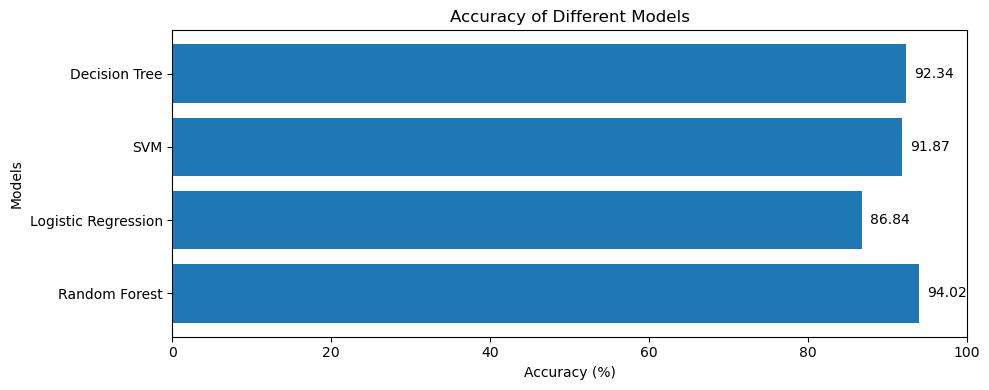

In [76]:
accuracy_scores = [accuracy_rf, accuracy_lg, accuracy_svm, accuracy_dt]
models = ['Random Forest', 'Logistic Regression', 'SVM', 'Decision Tree']

plt.figure(figsize=(10, 4))
plt.barh(models, accuracy_scores)
plt.xlabel('Accuracy (%)')
plt.ylabel('Models')
plt.title('Accuracy of Different Models')
plt.xlim(0, 100)



for i, v in enumerate(accuracy_scores):
    plt.text(v + 1, i, str(round(v, 2)), va='center')

# Show the plot
plt.tight_layout()
plt.show()